# Difference_Image_Prediction

In this code the aim is to pass in image data into a CNN and use it to predict variable image height for each layer. Each image has an associated error value attached and this is what it is going to learn.

# Installs and Imports

In [ ]:
# For Pandas data manipulation 
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Needed to work with .xls files
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# Used to work with arrays and matrix data structures
import numpy as np
# Data manipulation and analysis tool using data structures
import pandas as pd
# Used to evaluate machine learning performance, by splitting dataset
from sklearn.model_selection import train_test_split
# Training and inference of neural networks
import tensorflow as tf
# Measure of variance form dependent value to independent value
from sklearn.metrics import r2_score
# Data visualisation
import matplotlib.pyplot as plt
# For solving computer vision problems
import cv2
# cv2 has some issues and this solves it for colab
from google.colab.patches import cv2_imshow
# Python Imaging library that allows for more extensive editing capabilities
from PIL import Image, ImageChops
# Used to retrieve files/ pathnames matching a specified pattern
import glob
# Get current user environment
import os
# Importing .CSV files
import csv
# Working with paths, checking if they are absolute or not (True or False)
from pathlib import Path
# Used to do mathematical operations easily
import math

from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Importing Data

In [ ]:
# Reading in the Error per Image from .xls file 
Error = pd.read_excel('Error_Per_Diff_Image_Updated.xls')
# Printing contents of file
print(Error)

    ERR1  ERR2  ERR3  ERR4  ERR5  ERR6  ERR7  ERR8  ERR9  ERR10  ERR11  ERR12  \
0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
89   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
90   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
91   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
92   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
93   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   

    ERR13  
0     0.0  
1  

In [ ]:
# Looping though and printing column of data
for i in range(88):
  print(Error['ERR1'][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.29576012181820144
0.4181599527291072
0.4806272649993289
0.5134592450542211
0.4445693242144531
0.50288269135532
0.5155906007445474
0.4531256026498853
0.498661635134739
0.5079499644388356
0.5902682746586977
0.5460289518790334
0.4868338838499859
0.5137076332309439
0.4880742819498935
0.5501821256165349
0.5245233184043296
0.4890261794967131
0.5174010574239524
0.4897219749482782
0.5409609074036648
0.5739147673713588
0.57304078040171
0.5496020389429463
0.5000146564452104
0.4898816530618857
0.4760228270277192
0.5042943384466329
0.5334298087411039
0.4996605875846024
0.514608618915454
0.4840661298807891
0.47467751963577964
0.4911961047796982
0.5315167569452266
0.5593832876412226
0.5481579933938002
0.5193349367998654
0.4799160417107003
0.5074917576780488
0.5560238761206395
0.5047363459785028
0.4739369834567303
0.3852238347740362
0.44553047846351085
0.41299779844765105
0.3798719180966986
0.3675543329851785
0.3176931063795649

In [ ]:
# To hold all paths to Difference Images 
Diff_Array = []

# For each folder of Image Differences (Diff1 - Diff13)
for l in range(1,14):
  count = 0
  
  # Printing what Diff folder currently in
  #print(l)

  # Iterate through the Difference Image directory  
  # To know how many files are in the current directory              
  for path in os.listdir(f'/content/drive/MyDrive/Diff_All/Diff{l}'):
      # Checking if current path is a file
      if os.path.isfile(os.path.join(f'/content/drive/MyDrive/Diff_All/Diff{l}', path)):
          # Increase count by 1
          count += 1
  #print(count)

  # Going through each image within the current directory {l} adding each image {i} to an Error_Array
  for i in range(1,count+1): 
      for diff_Image in glob.glob(f'/content/drive/MyDrive/Diff_All/Diff{l}/{i}.jpg'):            
            Diff_Array.append(diff_Image)

In [ ]:
print(Diff_Array)

['/content/drive/MyDrive/Diff_All/Diff1/1.jpg', '/content/drive/MyDrive/Diff_All/Diff1/2.jpg', '/content/drive/MyDrive/Diff_All/Diff1/3.jpg', '/content/drive/MyDrive/Diff_All/Diff1/4.jpg', '/content/drive/MyDrive/Diff_All/Diff1/5.jpg', '/content/drive/MyDrive/Diff_All/Diff1/6.jpg', '/content/drive/MyDrive/Diff_All/Diff1/7.jpg', '/content/drive/MyDrive/Diff_All/Diff1/8.jpg', '/content/drive/MyDrive/Diff_All/Diff1/9.jpg', '/content/drive/MyDrive/Diff_All/Diff1/10.jpg', '/content/drive/MyDrive/Diff_All/Diff1/11.jpg', '/content/drive/MyDrive/Diff_All/Diff1/12.jpg', '/content/drive/MyDrive/Diff_All/Diff1/13.jpg', '/content/drive/MyDrive/Diff_All/Diff1/14.jpg', '/content/drive/MyDrive/Diff_All/Diff1/15.jpg', '/content/drive/MyDrive/Diff_All/Diff1/16.jpg', '/content/drive/MyDrive/Diff_All/Diff1/17.jpg', '/content/drive/MyDrive/Diff_All/Diff1/18.jpg', '/content/drive/MyDrive/Diff_All/Diff1/19.jpg', '/content/drive/MyDrive/Diff_All/Diff1/20.jpg', '/content/drive/MyDrive/Diff_All/Diff1/21.jpg', 

In [ ]:
# Adding each Error to Array for easier access
Error_Array = []

# Looping through Error_Array retrieving the Name and Values in each column
for (columnName, columnData) in Error.iteritems():
  #print('Column Name : ', columnName)

  # Columns being different lengths has to be dealt with
  # Max file leangth is 94 and if the values == Nan it breaks
  for i in range(94):
    if math.isnan(columnData[i])==True:
       break
    else:
      # Appending Error value to Array
      Error_Array.append(columnData[i])

In [ ]:
print(Error_Array[100:120])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2138575918072014, 0.36626919415778664, 0.3660161776299448, 0.34407470775819643, 0.37529525023180327, 0.41132310673440514, 0.3959492671006003, 0.40382980627264997, 0.41511526908462015, 0.42760950293051764]


Values for both Array must be the same size

In [ ]:
print('Error_Array length:',len(Error_Array))
print('Difference Image Array length:',len(Diff_Array))

Error_Array length: 1036
Difference Image Array length: 1036


Setting up data to be put into a dataframe

In [ ]:
data = {
  "Difference_Image": Diff_Array,
  "Error_Data": Error_Array
}

In [ ]:
# Loading data into a DataFrame object:
df = pd.DataFrame(data)
# Printing dataframe
print(df)

                                   Difference_Image  Error_Data
0       /content/drive/MyDrive/Diff_All/Diff1/1.jpg         0.0
1       /content/drive/MyDrive/Diff_All/Diff1/2.jpg         0.0
2       /content/drive/MyDrive/Diff_All/Diff1/3.jpg         0.0
3       /content/drive/MyDrive/Diff_All/Diff1/4.jpg         0.0
4       /content/drive/MyDrive/Diff_All/Diff1/5.jpg         0.0
...                                             ...         ...
1031  /content/drive/MyDrive/Diff_All/Diff13/86.jpg         0.0
1032  /content/drive/MyDrive/Diff_All/Diff13/87.jpg         0.0
1033  /content/drive/MyDrive/Diff_All/Diff13/88.jpg         0.0
1034  /content/drive/MyDrive/Diff_All/Diff13/89.jpg         0.0
1035  /content/drive/MyDrive/Diff_All/Diff13/90.jpg         0.0

[1036 rows x 2 columns]


# CNN

In [ ]:
# Using all of df for training
image_df = df.sample(1036, random_state=1).reset_index(drop=True)
# Splitting up image_df into training and testing
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255
)

In [ ]:
train_df

,Difference_Image,Error_Data
286,/content/drive/MyDrive/Diff_All/Diff12/55.jpg,0.000000
602,/content/drive/MyDrive/Diff_All/Diff3/65.jpg,0.372369
386,/content/drive/MyDrive/Diff_All/Diff1/59.jpg,0.556024
688,/content/drive/MyDrive/Diff_All/Diff12/40.jpg,0.364783
578,/content/drive/MyDrive/Diff_All/Diff6/25.jpg,0.387513
...,...,...
960,/content/drive/MyDrive/Diff_All/Diff4/22.jpg,0.000000
847,/content/drive/MyDrive/Diff_All/Diff4/57.jpg,0.369376
715,/content/drive/MyDrive/Diff_All/Diff13/66.jpg,0.000000
905,/content/drive/MyDrive/Diff_All/Diff13/43.jpg,0.413228


In [ ]:
test_df

,Difference_Image,Error_Data
855,/content/drive/MyDrive/Diff_All/Diff4/18.jpg,0.000000
577,/content/drive/MyDrive/Diff_All/Diff8/83.jpg,0.000000
267,/content/drive/MyDrive/Diff_All/Diff9/49.jpg,0.351849
995,/content/drive/MyDrive/Diff_All/Diff4/4.jpg,0.000000
99,/content/drive/MyDrive/Diff_All/Diff9/32.jpg,0.332143
...,...,...
276,/content/drive/MyDrive/Diff_All/Diff10/15.jpg,0.000000
432,/content/drive/MyDrive/Diff_All/Diff7/74.jpg,0.000000
1006,/content/drive/MyDrive/Diff_All/Diff13/68.jpg,0.000000
314,/content/drive/MyDrive/Diff_All/Diff9/18.jpg,0.338612


In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Difference_Image',
    y_col='Error_Data',
    target_size=(120, 120), #target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Difference_Image',
    y_col='Error_Data',
    target_size=(120, 120), #target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Difference_Image',
    y_col='Error_Data',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=16,
    shuffle=False
)

Found 580 validated image filenames.
Found 145 validated image filenames.
Found 311 validated image filenames.


In [ ]:
inputs = tf.keras.Input(shape=(120, 120, 3))  #inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
#x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
#x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
#outputs = tf.keras.layers.Dense(1, activation='linear')(x)
#outputs = tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)(x)
outputs = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
19/19 [==============================] - 12s 622ms/step - loss: 0.1149 - val_loss: 0.1026
Epoch 2/50
19/19 [==============================] - 11s 566ms/step - loss: 0.0890 - val_loss: 0.0778
Epoch 3/50
19/19 [==============================] - 11s 558ms/step - loss: 0.0595 - val_loss: 0.0410
Epoch 4/50
19/19 [==============================] - 11s 553ms/step - loss: 0.0231 - val_loss: 0.0090
Epoch 5/50
19/19 [==============================] - 11s 560ms/step - loss: 0.0052 - val_loss: 0.0027
Epoch 6/50
19/19 [==============================] - 11s 564ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 7/50
19/19 [==============================] - 11s 567ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/50
19/19 [==============================] - 11s 558ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 9/50
19/19 [==============================] - 11s 562ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 10/50
19/19 [==============================] - 11s 564ms/step - loss: 0.0020 - val_lo

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        9248

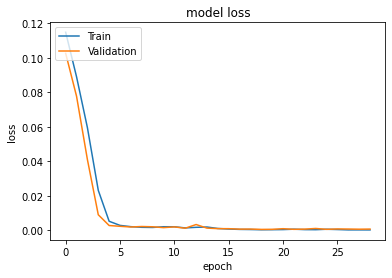

In [ ]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predicted_layer_perc = np.squeeze(model.predict(test_images))
true_layer_perc = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_layer_perc, predicted_layer_perc)
print("Test R^2 Score: {:.5f}".format(r2))

20/20 [==============================] - 3s 156ms/step
     Test RMSE: 0.02227
Test R^2 Score: 0.98885


In [ ]:
prediction_table = pd.DataFrame({'Actual': true_layer_perc, 'Predicted': predicted_layer_perc})
prediction_table.head()

,Actual,Predicted
0,0.000000,0.004283
1,0.000000,0.004283
2,0.351849,0.388817
3,0.000000,0.004283
4,0.332143,0.355711


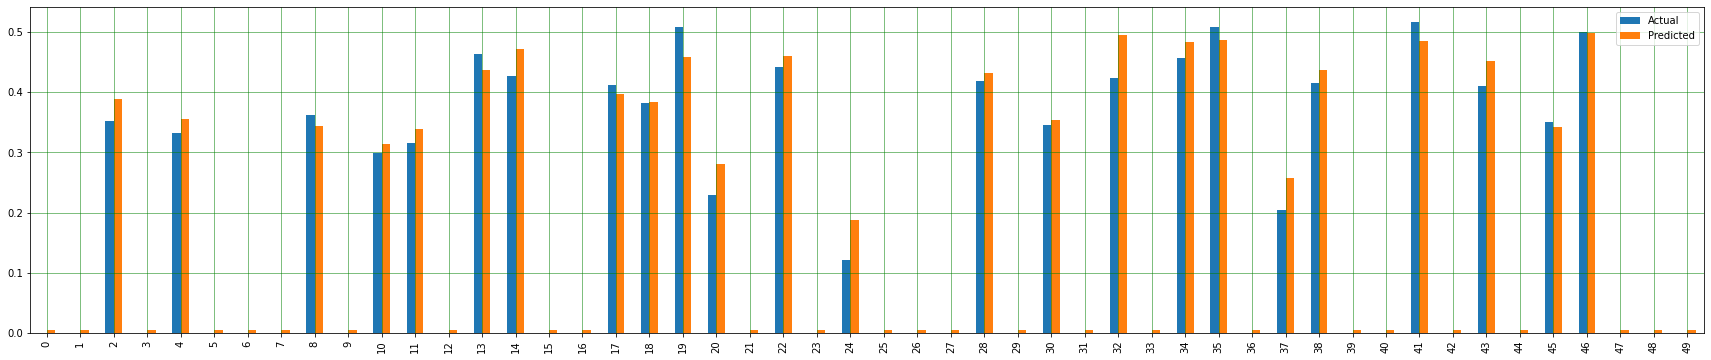

In [ ]:
prediction_table[0:50].plot(kind='bar',figsize=(30,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs Predicted Layer Values')
plt.xlabel('Layer Height')
plt.ylabel('Value in Array')
plt.show()

# Testing Machine Learning on Full-Scan Diff4

In [ ]:
model.layers[0].input_shape


[(None, 120, 120, 3)]

In [ ]:
IMG_SIZE = 120  #240  #120
#img = image.load_img('34.jpg', target_size=(IMG_SIZE, IMG_SIZE))

img = tf.keras.utils.load_img('21.jpg', target_size=(IMG_SIZE, IMG_SIZE))

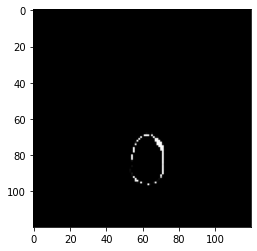

In [ ]:
plt.imshow(img)

In [ ]:
img = np.expand_dims(img, axis=0)

In [ ]:
result= model.predict(img)
print(result)

1/1 [==============================] - 0s 102ms/step
[[0.32054898]]


In [ ]:
count = 0
test = []
for path in os.listdir(f'/content/drive/MyDrive/Diff_All/Diff4'):
    # check if current path is a file
    if os.path.isfile(os.path.join(f'/content/drive/MyDrive/Diff_All/Diff4', path)):
        count += 1
print(count)

for i in range(1,count+1): 
      for image1 in glob.glob(f'/content/drive/MyDrive/Diff_All/Diff4/{i}.jpg'):                    
            #print(model.predict(image1))
            IMG_SIZE = 120
            img = tf.keras.utils.load_img(image1, target_size=(IMG_SIZE, IMG_SIZE))
            img = np.expand_dims(img, axis=0)
            result = model.predict(img)
            #print(float(result[0]))
            test.append(float(result))
            #test.append(image1)
            #model.predict(image1)

83
1/1 [==============================] - 0s 23ms/step


In [ ]:
print(test[0])

0.00428339559584856


In [ ]:
print(test)

[0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.00428339559584856, 0.29364508390426636, 0.44661837816238403, 0.5079217553138733, 0.49923011660575867, 0.5118107199668884, 0.44259536266326904, 0.5435287356376648, 0.5159780979156494, 0.5361291766166687, 0.5517349243164062, 0.5025320649147034, 0.5173407196998596, 0.44577252864837646, 0.5677397847175598, 0.5471370220184326, 0.48786023259162903, 0.5505984425544739, 0.550291895866394, 0.5311707854270935, 0.5280600786209106, 0.5797010660171509, 0.5168991684913635, 0.5284804105758667, 0.5365761518478394, 0.55435538